In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image
#Matplot to visualize data, also Seaborn and pandas do this
import matplotlib.pyplot as plt
# Inline to show images in jupyter notebook
%matplotlib inlineimport pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image
#Matplot to visualize data, also Seaborn and pandas do this
import matplotlib.pyplot as plt
# Inline to show images in jupyter notebook
%matplotlib inline

UsageError: unrecognized arguments: pandas as pd


In [1]:
### Mapping publication with generes 
# [TODO] : Need to change the code here

a= '''COMEDIES
ALLS WELL THAT ENDS WELL
AS YOU LIKE IT
THE COMEDY OF ERRORS
LOVE'S LABOUR'S LOST
MEASURE FOR MEASURE
THE MERCHANT OF VENICE
THE MERRY WIVES OF WINDSOR
A MIDSUMMER NIGHT'S DREAM
MUCH ADO ABOUT NOTHING
THE TAMING OF THE SHREW
THE TEMPEST
TWELFTH NIGHT; OR, WHAT YOU WILL
THE TWO GENTLEMEN OF VERONA
THE WINTER'S TALE
HISTORIES
THE FIRST PART OF KING HENRY THE FOURTH
SECOND PART OF KING HENRY IV
THE LIFE OF KING HENRY THE FIFTH
THE FIRST PART OF HENRY THE SIXTH
THE SECOND PART OF KING HENRY THE SIXTH
THE THIRD PART OF KING HENRY THE SIXTH
KING HENRY THE EIGHTH
KING JOHN
Pericles
KING RICHARD THE SECOND
KING RICHARD III
TRAGEDIES
THE TRAGEDY OF ANTONY AND CLEOPATRA
THE TRAGEDY OF CORIOLANUS
CYMBELINE
THE TRAGEDY OF HAMLET, PRINCE OF DENMARK
THE TRAGEDY OF JULIUS CAESAR
THE TRAGEDY OF KING LEAR
THE TRAGEDY OF MACBETH
THE TRAGEDY OF OTHELLO, MOOR OF VENICE
THE TRAGEDY OF ROMEO AND JULIET
THE LIFE OF TIMON OF ATHENS
THE TRAGEDY OF TITUS ANDRONICUS
THE HISTORY OF TROILUS AND CRESSIDA
POEMS
A LOVER'S COMPLAINT
Passionate Pilgrim
Phoenix and the Turtle
Rape of Lucrece
Venus and Adonis
THE SONNETS'''                          ### If data need to take from file 
publication_genere_mapping = dict()
temp = ''
for word in a.split('\n'):
    if word.upper() in ('COMEDIES','HISTORIES','TRAGEDIES','POEMS'):
        temp = word
    else:
        word = ''.join([l for l in word if l.isalpha() or l==' '])
        publication_genere_mapping[word]=temp
publication_genere_mapping
  

{'ALLS WELL THAT ENDS WELL': 'COMEDIES',
 'AS YOU LIKE IT': 'COMEDIES',
 'THE COMEDY OF ERRORS': 'COMEDIES',
 'LOVES LABOURS LOST': 'COMEDIES',
 'MEASURE FOR MEASURE': 'COMEDIES',
 'THE MERCHANT OF VENICE': 'COMEDIES',
 'THE MERRY WIVES OF WINDSOR': 'COMEDIES',
 'A MIDSUMMER NIGHTS DREAM': 'COMEDIES',
 'MUCH ADO ABOUT NOTHING': 'COMEDIES',
 'THE TAMING OF THE SHREW': 'COMEDIES',
 'THE TEMPEST': 'COMEDIES',
 'TWELFTH NIGHT OR WHAT YOU WILL': 'COMEDIES',
 'THE TWO GENTLEMEN OF VERONA': 'COMEDIES',
 'THE WINTERS TALE': 'COMEDIES',
 'THE FIRST PART OF KING HENRY THE FOURTH': 'HISTORIES',
 'SECOND PART OF KING HENRY IV': 'HISTORIES',
 'THE LIFE OF KING HENRY THE FIFTH': 'HISTORIES',
 'THE FIRST PART OF HENRY THE SIXTH': 'HISTORIES',
 'THE SECOND PART OF KING HENRY THE SIXTH': 'HISTORIES',
 'THE THIRD PART OF KING HENRY THE SIXTH': 'HISTORIES',
 'KING HENRY THE EIGHTH': 'HISTORIES',
 'KING JOHN': 'HISTORIES',
 'Pericles': 'HISTORIES',
 'KING RICHARD THE SECOND': 'HISTORIES',
 'KING RICHARD I

In [2]:
## Now we are processing the data

In [3]:
publication_string_break_1 = """<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM
SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS
PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE
WITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE
DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS
PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED
COMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY
SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>"""

publication_string_break_2 = """<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM         
SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS  
PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE
WITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE    
DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS      
PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED             
COMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY  
SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>"""


split_string_author_name = "by William Shakespeare"

In [4]:
## Its time to read the text file t8.shaskespear

In [6]:
import re
import pandas as pd
def string_split(delimiters, string, maxsplit=0):
    regexPattern = '|'.join(map(re.escape, delimiters))
    return re.split(regexPattern, string, maxsplit)
text_file = open("data/t8.shakespeare.txt", "r")
data = text_file.read()
text_file.close()

In [8]:
#We have used delimerters
# delimerters = publication_string_break_1, publication_string_break_2
delimerters = split_string_author_name
multiple_publications = data.split(split_string_author_name)

In [9]:
#Using Len we can find out the length
len(multiple_publications)

39

In [10]:
new_delimerters = publication_string_break_1, publication_string_break_2
year_title = []
publication = [] 
index_data_to_append = None
data_to_append = None

for index, publi in enumerate(multiple_publications):
    split_data = string_split(new_delimerters, publi)
    next_pulication_title_year = split_data[-1].strip()
    if next_pulication_title_year != 'End of this Etext of The Complete Works of William Shakespeare':
        if len(next_pulication_title_year) < 100:
            year_title.append(next_pulication_title_year)
        else:
            actual_year_pub_data = next_pulication_title_year.split("THE END")
            year_title.append(actual_year_pub_data[-1])
            index_data_to_append = index + 1
            data_to_append = actual_year_pub_data[-2]
        
    if index == 0:
        continue
    else:
        previous_publication = split_data[-2]
        publication.append(previous_publication)

publication[index_data_to_append] = publication[index_data_to_append] + data_to_append


In [11]:
master_data = []

for index, year_title_data in enumerate(year_title):
    year_title_data_cleaned = (list(filter(lambda x: x != '', year_title_data.split("\n"))))
    print(year_title_data_cleaned)
    master_data.append({'year' : year_title_data_cleaned[0], 'title' : year_title_data_cleaned[1], 'data' : publication[index]})


['1609', 'THE SONNETS']
['1603', 'ALLS WELL THAT ENDS WELL']
['1607', 'THE TRAGEDY OF ANTONY AND CLEOPATRA']
['1601', 'AS YOU LIKE IT']
['1593', 'THE COMEDY OF ERRORS']
['1608', 'THE TRAGEDY OF CORIOLANUS']
['1609', 'CYMBELINE']
['1604', 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK']
['1598', 'THE FIRST PART OF KING HENRY THE FOURTH']
['1598', 'SECOND PART OF KING HENRY IV']
['1599', 'THE LIFE OF KING HENRY THE FIFTH']
['1592', 'THE FIRST PART OF HENRY THE SIXTH']
['1591', 'THE SECOND PART OF KING HENRY THE SIXTH']
['1591', 'THE THIRD PART OF KING HENRY THE SIXTH']
['1611', 'KING HENRY THE EIGHTH']
['1597', 'KING JOHN']
['1599', 'THE TRAGEDY OF JULIUS CAESAR']
['1606', 'THE TRAGEDY OF KING LEAR']
['1595', "LOVE'S LABOUR'S LOST"]
['1606', 'THE TRAGEDY OF MACBETH']
['1605', 'MEASURE FOR MEASURE']
['1597', 'THE MERCHANT OF VENICE']
['1601', 'THE MERRY WIVES OF WINDSOR']
['1596', "A MIDSUMMER NIGHT'S DREAM"]
['1599', 'MUCH ADO ABOUT NOTHING']
['1605', 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE']

In [12]:
df_shake_spear_data = pd.DataFrame(master_data)

In [13]:
def get_genere_mapping(title_name):
    # title_name.re TWELFTH NIGHT; OR, WHAT YOU WILL
    new_string =  title_name.replace("\'", "").replace(";", "").replace(",", "")
    return publication_genere_mapping.get(new_string)

df_shake_spear_data['genere'] = df_shake_spear_data['title'].apply(get_genere_mapping)

In [14]:
#df_shake_spear_data.to_excel("ProcessedData.xlsx", index=False)

In [15]:
df_shake_spear_data.columns

Index(['year', 'title', 'data', 'genere'], dtype='object')

In [16]:
df_shake_spear_data

,year,title,data,genere
0,1609,THE SONNETS,\n\n\n\n 1\n From fairest...,POEMS
1,1603,ALLS WELL THAT ENDS WELL,\n\n\n\n\nACT V. SCENE 1.\nMarseilles. A stree...,COMEDIES
2,1607,THE TRAGEDY OF ANTONY AND CLEOPATRA,\n\n\n\n\nACT II. SCENE I.\nMessina. POMPEY'S ...,TRAGEDIES
3,1601,AS YOU LIKE IT,\n\n\n\nACT IV. SCENE I.\nThe forest\n\nEnter ...,COMEDIES
4,1593,THE COMEDY OF ERRORS,\n\n\n\n\n\nACT V. SCENE 1\n\nA street before ...,COMEDIES
5,1608,THE TRAGEDY OF CORIOLANUS,\n\n\n\nACT V. SCENE I.\nRome. A public place\...,TRAGEDIES
6,1609,CYMBELINE,\n\n\n\nACT V. SCENE I.\nBritain. The Roman ca...,TRAGEDIES
7,1604,"THE TRAGEDY OF HAMLET, PRINCE OF DENMARK",\n\n\n\nACT V. Scene I.\nElsinore. A churchyar...,TRAGEDIES
8,1598,THE FIRST PART OF KING HENRY THE FOURTH,\n\n\n\nACT V. Scene I.\nThe King's camp near ...,HISTORIES
9,1598,SECOND PART OF KING HENRY IV,\n\n\n\nACT V. SCENE I.\nGloucestershire. SHAL...,HISTORIES


In [17]:
def clean(file):
    stop_words = open("data/stopwords.txt").read().split()
    line =file.split('\n')
    words = [data_processing(i).split(' ') for i in line]
    #print(words)
    updated_words = [input_word for input_word in words if input_word[0]!='' ]
    #print("----------------------------------------------------------------------------------------------------------")
    #print(updated_words)
    #print(len(updated_words[0]))
    return updated_words

In [18]:
def data_processing(file):
    shakespeare = file
    doc = shakespeare.replace('\n', '')
    doc = re.sub(r"\d", " ", doc)  # remove all digits
    doc = re.sub(r"[^\w\s]", " ", doc)  # remove punctuations

    doc = re.sub(r"[_]", " ", doc)  # remove special character
    doc = re.sub(r"\sd\s", " ", doc)  # remove d from words (because of 'd words)
    doc = re.sub(r"\ss\s", " ", doc)  # remove s from words (because of 's words)
    doc = re.sub(r"\so\s", " ", doc)  # remove o from words (because of 'o words)

    doc = re.sub(r"\s+", " ", doc)  # substitute all spaces with a single space
    doc = doc.lower()  # lowercase every word
    doc = doc.strip()
    return doc

In [19]:
clean(df_shake_spear_data.loc[0,'data'])

[['from', 'fairest', 'creatures', 'we', 'desire', 'increase'],
 ['that', 'thereby', 'beauty', 'rose', 'might', 'never', 'die'],
 ['but', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease'],
 ['his', 'tender', 'heir', 'might', 'bear', 'his', 'memory'],
 ['but', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes'],
 ['feed',
  'st',
  'thy',
  'light',
  'flame',
  'with',
  'self',
  'substantial',
  'fuel'],
 ['making', 'a', 'famine', 'where', 'abundance', 'lies'],
 ['thy', 'self', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel'],
 ['thou', 'that', 'art', 'now', 'the', 'world', 'fresh', 'ornament'],
 ['and', 'only', 'herald', 'to', 'the', 'gaudy', 'spring'],
 ['within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content'],
 ['and', 'tender', 'churl', 'mak', 'st', 'waste', 'in', 'niggarding'],
 ['pity', 'the', 'world', 'or', 'else', 'this', 'glutton', 'be'],
 ['to', 'eat', 'the', 'world', 'due', 'by', 'the', 'grave', 'and', 'thee'],
 ['when', 'forty', 'winters', 

In [20]:
df_shake_spear_data['preprocessed_data'] = df_shake_spear_data['data'].apply(clean)

In [21]:
df_shake_spear_data.head()

,year,title,data,genere,preprocessed_data
0,1609,THE SONNETS,\n\n\n\n 1\n From fairest...,POEMS,"[[from, fairest, creatures, we, desire, increa..."
1,1603,ALLS WELL THAT ENDS WELL,\n\n\n\n\nACT V. SCENE 1.\nMarseilles. A stree...,COMEDIES,"[[act, v, scene], [marseilles, a, street], [en..."
2,1607,THE TRAGEDY OF ANTONY AND CLEOPATRA,\n\n\n\n\nACT II. SCENE I.\nMessina. POMPEY'S ...,TRAGEDIES,"[[act, ii, scene, i], [messina, pompey, s, hou..."
3,1601,AS YOU LIKE IT,\n\n\n\nACT IV. SCENE I.\nThe forest\n\nEnter ...,COMEDIES,"[[act, iv, scene, i], [the, forest], [enter, r..."
4,1593,THE COMEDY OF ERRORS,\n\n\n\n\n\nACT V. SCENE 1\n\nA street before ...,COMEDIES,"[[act, v, scene], [a, street, before, a, prior..."


In [22]:
all_sen_list = []
all_sen_len = []
for i in df_shake_spear_data['preprocessed_data']:
    for j in i:
        all_sen_list.append(j)
        all_sen_len.append(len(j))

In [23]:
all_sen_list[:10]

[['from', 'fairest', 'creatures', 'we', 'desire', 'increase'],
 ['that', 'thereby', 'beauty', 'rose', 'might', 'never', 'die'],
 ['but', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease'],
 ['his', 'tender', 'heir', 'might', 'bear', 'his', 'memory'],
 ['but', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes'],
 ['feed',
  'st',
  'thy',
  'light',
  'flame',
  'with',
  'self',
  'substantial',
  'fuel'],
 ['making', 'a', 'famine', 'where', 'abundance', 'lies'],
 ['thy', 'self', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel'],
 ['thou', 'that', 'art', 'now', 'the', 'world', 'fresh', 'ornament'],
 ['and', 'only', 'herald', 'to', 'the', 'gaudy', 'spring']]

In [24]:
all_sen_len[:10]

[6, 7, 8, 7, 8, 9, 6, 10, 8, 7]

In [25]:
import numpy as np
np.mean(all_sen_len)

7.83051940660925

In [26]:
def avg_genere(pr_data):
    all_sen_list = []
    all_sen_len = []
    for i in pr_data:
        for j in i:
            all_sen_list.append(j)
            all_sen_len.append(len(j))
    return np.mean(all_sen_len)

In [27]:
#now its time to findout average after removing stopwards

In [28]:
df_shake_spear_data.groupby('genere').agg({'preprocessed_data':avg_genere})

,preprocessed_data
genere,
COMEDIES,8.036632
HISTORIES,8.016132
POEMS,8.184634
TRAGEDIES,7.481297


In [ ]:
df_shake_spear_data['num_sent']=0
['num_ques']=0

In [36]:
for i in df_shake_spear_data.index:
    df_shake_spear_data.loc[i,'num_sent'] = len(df_shake_spear_data.loc[i,'preprocessed_data'])
    ques_count =0
    for j in df_shake_spear_data.loc[i,'data'].split('\n'):
        if '?' in j:
            ques_count+=1
    df_shake_spear_data.loc[i,'num_ques']= ques_count
    #print(df_shake_spear_data.loc[i,'data'])

In [37]:
df_shake_spear_data.head()

,year,title,data,genere,preprocessed_data,num_sent,num_ques
0,1609,THE SONNETS,\n\n\n\n 1\n From fairest...,POEMS,"[[from, fairest, creatures, we, desire, increa...",2156,91.0
1,1603,ALLS WELL THAT ENDS WELL,\n\n\n\n\nACT V. SCENE 1.\nMarseilles. A stree...,COMEDIES,"[[act, v, scene], [marseilles, a, street], [en...",489,38.0
2,1607,THE TRAGEDY OF ANTONY AND CLEOPATRA,\n\n\n\n\nACT II. SCENE I.\nMessina. POMPEY'S ...,TRAGEDIES,"[[act, ii, scene, i], [messina, pompey, s, hou...",3203,210.0
3,1601,AS YOU LIKE IT,\n\n\n\nACT IV. SCENE I.\nThe forest\n\nEnter ...,COMEDIES,"[[act, iv, scene, i], [the, forest], [enter, r...",398,43.0
4,1593,THE COMEDY OF ERRORS,\n\n\n\n\n\nACT V. SCENE 1\n\nA street before ...,COMEDIES,"[[act, v, scene], [a, street, before, a, prior...",452,34.0


In [38]:
probability_asking_question_all = df_shake_spear_data['num_ques'].sum()/df_shake_spear_data['num_sent'].sum()
probability_asking_question_all

0.07565352657737982

In [39]:
# ACTwise
df_shake_spear_data['probability_asking_question']= df_shake_spear_data['num_ques']/df_shake_spear_data['num_sent']


In [40]:
df_shake_spear_data.head()

,year,title,data,genere,preprocessed_data,num_sent,num_ques,probability_asking_question
0,1609,THE SONNETS,\n\n\n\n 1\n From fairest...,POEMS,"[[from, fairest, creatures, we, desire, increa...",2156,91.0,0.042208
1,1603,ALLS WELL THAT ENDS WELL,\n\n\n\n\nACT V. SCENE 1.\nMarseilles. A stree...,COMEDIES,"[[act, v, scene], [marseilles, a, street], [en...",489,38.0,0.077710
2,1607,THE TRAGEDY OF ANTONY AND CLEOPATRA,\n\n\n\n\nACT II. SCENE I.\nMessina. POMPEY'S ...,TRAGEDIES,"[[act, ii, scene, i], [messina, pompey, s, hou...",3203,210.0,0.065564
3,1601,AS YOU LIKE IT,\n\n\n\nACT IV. SCENE I.\nThe forest\n\nEnter ...,COMEDIES,"[[act, iv, scene, i], [the, forest], [enter, r...",398,43.0,0.108040
4,1593,THE COMEDY OF ERRORS,\n\n\n\n\n\nACT V. SCENE 1\n\nA street before ...,COMEDIES,"[[act, v, scene], [a, street, before, a, prior...",452,34.0,0.075221


In [41]:
import pandas as pd
df_genere = pd.DataFrame()
df_genere['name']= [i for i in df_shake_spear_data.genere.unique()]
df_genere['probability_asking_question'] = 0
for i,df_temp in df_shake_spear_data.groupby('genere'):
    genere = df_temp['num_ques'].sum()/df_temp['num_sent'].sum()
    df_genere.loc[df_genere['name']==i,'probability_asking_question']=genere

In [42]:
df_genere

,name,probability_asking_question
0,POEMS,0.039421
1,COMEDIES,0.080094
2,TRAGEDIES,0.078621
3,HISTORIES,0.079943


<AxesSubplot:ylabel='Density'>

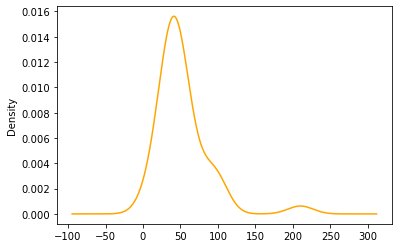

In [44]:
df_shake_spear_data['num_ques'].plot(kind = 'density', color='Orange')

In [45]:
import nltk
#nltk.download('punkt')
from nltk.tokenize import sent_tokenize

In [46]:
pip install text2emotion

Note: you may need to restart the kernel to use updated packages.


In [47]:
import text2emotion as te

[nltk_data] Downloading package stopwords to C:\Users\Manisha
[nltk_data]     Bagora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Manisha
[nltk_data]     Bagora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Manisha
[nltk_data]     Bagora\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
df_shake_spear_data.data.iloc[0]

"\n\n\n\n                     1\n  From fairest creatures we desire increase,\n  That thereby beauty's rose might never die,\n  But as the riper should by time decease,\n  His tender heir might bear his memory:\n  But thou contracted to thine own bright eyes,\n  Feed'st thy light's flame with self-substantial fuel,\n  Making a famine where abundance lies,\n  Thy self thy foe, to thy sweet self too cruel:\n  Thou that art now the world's fresh ornament,\n  And only herald to the gaudy spring,\n  Within thine own bud buriest thy content,\n  And tender churl mak'st waste in niggarding:\n    Pity the world, or else this glutton be,\n    To eat the world's due, by the grave and thee.\n\n\n                     2\n  When forty winters shall besiege thy brow,\n  And dig deep trenches in thy beauty's field,\n  Thy youth's proud livery so gazed on now,\n  Will be a tattered weed of small worth held:  \n  Then being asked, where all thy beauty lies,\n  Where all the treasure of thy lusty days;\n 

In [57]:
text = df_shake_spear_data.data.iloc[0]

In [58]:
text

"\n\n\n\n                     1\n  From fairest creatures we desire increase,\n  That thereby beauty's rose might never die,\n  But as the riper should by time decease,\n  His tender heir might bear his memory:\n  But thou contracted to thine own bright eyes,\n  Feed'st thy light's flame with self-substantial fuel,\n  Making a famine where abundance lies,\n  Thy self thy foe, to thy sweet self too cruel:\n  Thou that art now the world's fresh ornament,\n  And only herald to the gaudy spring,\n  Within thine own bud buriest thy content,\n  And tender churl mak'st waste in niggarding:\n    Pity the world, or else this glutton be,\n    To eat the world's due, by the grave and thee.\n\n\n                     2\n  When forty winters shall besiege thy brow,\n  And dig deep trenches in thy beauty's field,\n  Thy youth's proud livery so gazed on now,\n  Will be a tattered weed of small worth held:  \n  Then being asked, where all thy beauty lies,\n  Where all the treasure of thy lusty days;\n 

In [50]:
te.get_emotion(text)

{'Happy': 0.2, 'Angry': 0.08, 'Surprise': 0.17, 'Sad': 0.29, 'Fear': 0.26}

In [60]:
from nltk.sentiment import SentimentIntensityAnalyzer
import operator
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(text)

{'neg': 0.137, 'neu': 0.636, 'pos': 0.227, 'compound': 1.0}

In [65]:
!pip3 install textblob

In [66]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize
df_shake_spear_data.head()

,year,title,data,genere,preprocessed_data,num_sent,num_ques,probability_asking_question
0,1609,THE SONNETS,\n\n\n\n 1\n From fairest...,POEMS,"[[from, fairest, creatures, we, desire, increa...",2156,91.0,0.042208
1,1603,ALLS WELL THAT ENDS WELL,\n\n\n\n\nACT V. SCENE 1.\nMarseilles. A stree...,COMEDIES,"[[act, v, scene], [marseilles, a, street], [en...",489,38.0,0.077710
2,1607,THE TRAGEDY OF ANTONY AND CLEOPATRA,\n\n\n\n\nACT II. SCENE I.\nMessina. POMPEY'S ...,TRAGEDIES,"[[act, ii, scene, i], [messina, pompey, s, hou...",3203,210.0,0.065564
3,1601,AS YOU LIKE IT,\n\n\n\nACT IV. SCENE I.\nThe forest\n\nEnter ...,COMEDIES,"[[act, iv, scene, i], [the, forest], [enter, r...",398,43.0,0.108040
4,1593,THE COMEDY OF ERRORS,\n\n\n\n\n\nACT V. SCENE 1\n\nA street before ...,COMEDIES,"[[act, v, scene], [a, street, before, a, prior...",452,34.0,0.075221


In [87]:
df_shake_spear_data.drop_duplicates(subset ="data", keep = 'first', inplace = True)
df_shake_spear_data['data'] = df_shake_spear_data['data'].astype('str')
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
df_shake_spear_data['Polarity'] = df_shake_spear_data['data'].apply(get_polarity)

In [88]:
df_shake_spear_data['Sentiment_Type']=''
df_shake_spear_data.loc[df_shake_spear_data.Polarity>0,'Sentiment_Type']='POSITIVE'
df_shake_spear_data.loc[df_shake_spear_data.Polarity==0,'Sentiment_Type']='NEUTRAL'
df_shake_spear_data.loc[df_shake_spear_data.Polarity<0,'Sentiment_Type']='NEGATIVE'

<AxesSubplot:title={'center':'Sentiment Analysis'}>

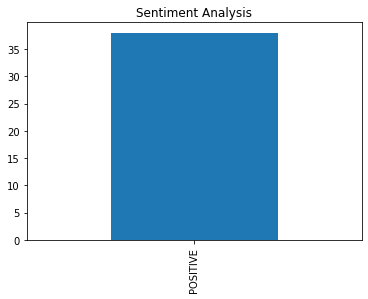

In [78]:
df_shake_spear_data.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")

In [79]:
df_shake_spear_data

,year,title,data,genere,preprocessed_data,num_sent,num_ques,probability_asking_question,Polarity,Sentiment_Type
0,1609,THE SONNETS,\n\n\n\n 1\n From fairest...,POEMS,"[[from, fairest, creatures, we, desire, increa...",2156,91.0,0.042208,0.166340,POSITIVE
1,1603,ALLS WELL THAT ENDS WELL,\n\n\n\n\nACT V. SCENE 1.\nMarseilles. A stree...,COMEDIES,"[[act, v, scene], [marseilles, a, street], [en...",489,38.0,0.077710,0.204824,POSITIVE
2,1607,THE TRAGEDY OF ANTONY AND CLEOPATRA,\n\n\n\n\nACT II. SCENE I.\nMessina. POMPEY'S ...,TRAGEDIES,"[[act, ii, scene, i], [messina, pompey, s, hou...",3203,210.0,0.065564,0.212785,POSITIVE
3,1601,AS YOU LIKE IT,\n\n\n\nACT IV. SCENE I.\nThe forest\n\nEnter ...,COMEDIES,"[[act, iv, scene, i], [the, forest], [enter, r...",398,43.0,0.108040,0.217639,POSITIVE
4,1593,THE COMEDY OF ERRORS,\n\n\n\n\n\nACT V. SCENE 1\n\nA street before ...,COMEDIES,"[[act, v, scene], [a, street, before, a, prior...",452,34.0,0.075221,0.037524,POSITIVE
5,1608,THE TRAGEDY OF CORIOLANUS,\n\n\n\nACT V. SCENE I.\nRome. A public place\...,TRAGEDIES,"[[act, v, scene, i], [rome, a, public, place],...",1144,74.0,0.064685,0.244552,POSITIVE
6,1609,CYMBELINE,\n\n\n\nACT V. SCENE I.\nBritain. The Roman ca...,TRAGEDIES,"[[act, v, scene, i], [britain, the, roman, cam...",974,62.0,0.063655,0.180516,POSITIVE
7,1604,"THE TRAGEDY OF HAMLET, PRINCE OF DENMARK",\n\n\n\nACT V. Scene I.\nElsinore. A churchyar...,TRAGEDIES,"[[act, v, scene, i], [elsinore, a, churchyard]...",739,98.0,0.132612,0.136884,POSITIVE
8,1598,THE FIRST PART OF KING HENRY THE FOURTH,\n\n\n\nACT V. Scene I.\nThe King's camp near ...,HISTORIES,"[[act, v, scene, i], [the, king, camp, near, s...",562,40.0,0.071174,0.195118,POSITIVE
9,1598,SECOND PART OF KING HENRY IV,\n\n\n\nACT V. SCENE I.\nGloucestershire. SHAL...,HISTORIES,"[[act, v, scene, i], [gloucestershire, shallow...",544,31.0,0.056985,0.127022,POSITIVE


In [81]:
#VADER (Valence Aware Dictionary and sEntiment Reasoner) 

In [82]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Manisha
[nltk_data]     Bagora\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df_shake_spear_data['scores'] = df_shake_spear_data['data'].apply(lambda Description: sid.polarity_scores(data))
df_shake_spear_data.head()